In [1031]:
# 환경 설정 코드
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family'] = 'NanumGothic'

df = pd.read_csv('hotel_bookings.csv')

In [1032]:
# 맨 위 5개 관측 데이터
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [1033]:
# 맨 아래 5개 관측 데이터
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [1034]:
# 데이터의 전체 정보(총 119390 레코드가 있음을 확인 가능)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [1035]:
# 수치형 데이터 확인(count: 합계, mean: 평균치, std: 표준편차, min: 최소값, max: 최대값)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [1036]:
# 범주형 데이터 확인(count: 합계, unique: 한 컬럼 내 범주의 개수, top: 최빈값, freq: 최빈값의 개수)
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [1037]:
# hotel 컬럼의 각 범주별 개수 계산
hotel_counts = df['hotel'].value_counts()

print("=== 호텔 유형별 예약 개수 ===")
for hotel_type, count in hotel_counts.items():
    print(f"{hotel_type}: {count}건")

=== 호텔 유형별 예약 개수 ===
City Hotel: 79330건
Resort Hotel: 40060건


In [1038]:
# is_canceled(호텔 예약 취소 여부) 컬럼의 범주 개수 계산
is_canceled_counts = df['is_canceled'].value_counts()

print("=== 예약 상태별 개수 ===")
print(f"호텔 예약 유지: {is_canceled_counts.get(0, 0)}")
print(f"호텔 예약 취소: {is_canceled_counts.get(1, 0)}")

=== 예약 상태별 개수 ===
호텔 예약 유지: 75166
호텔 예약 취소: 44224


In [1039]:
# 각 컬럼별 결측치 합계 계산
missing_values = df.isnull().sum()

print("=== 컬럼별 결측치 합계 ===")
for column, missing in missing_values.items():
    if missing > 0:
        print(f"{column}: {missing}건")

=== 컬럼별 결측치 합계 ===
children: 4건
country: 488건
agent: 16340건
company: 112593건


In [1040]:
# 각 컬럼별 결측치 비율 계산
missing_ratios = df.isnull().mean() * 100

print("=== 컬럼별 결측치 비율 (%) ===")
for column, ratio in missing_ratios.items():
    if ratio > 0:
        print(f"{column}: {ratio:.4f}%")

=== 컬럼별 결측치 비율 (%) ===
children: 0.0034%
country: 0.4087%
agent: 13.6862%
company: 94.3069%


In [1041]:
# children 결측치 처리 - 1
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [1042]:
# children 결측치 처리 - 2
# children의 결측치의 합계가 4개이므로 크게 의미 없을 것이라고 판단, 해당 결측치를 결측치 값 중 압도적으로 많은 0으로 치환함
df['children'] = df['children'].fillna(0)

In [1043]:
# country 결측치 처리 - 1
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [1044]:
# country 결측치 처리 - 2
# country는 결측치가 많지 않기 때문에 어떤 국가에도 명확히 속하지 않는 것으로 간주하고 "Unknown"로 치환
df['country'] = df['country'].fillna('Unknown')

In [1045]:
# agent 결측치 처리 - 1
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [1046]:
# agent 결측치 처리 - 2
agent_9_count = df['agent'].value_counts().get(9.0, 0)
total_agent_count = df['agent'].notnull().sum()
percentage_9 = (agent_9_count / total_agent_count) * 100
print(f"agent에서 9.0이 차지하는 비율: {percentage_9:.2f}%")

agent_240_count = df['agent'].value_counts().get(240.0, 0)
total_agent_count = df['agent'].notnull().sum()
percentage_240 = (agent_240_count / total_agent_count) * 100
print(f"agent에서 240.0이 차지하는 비율: {percentage_240:.2f}%")

agent에서 9.0이 차지하는 비율: 31.02%
agent에서 240.0이 차지하는 비율: 13.51%


In [1047]:
# agent 결측치 처리 - 3
# agent 컬럼의 범주를 이름 순으로 정렬
sorted_agent_counts = df['agent'].value_counts().sort_index()
print(sorted_agent_counts)

agent
1.0      7191
2.0       162
3.0      1336
4.0        47
5.0       330
         ... 
510.0       2
526.0      10
527.0      35
531.0      68
535.0       3
Name: count, Length: 333, dtype: int64


In [1048]:
# agent 결측치 처리 - 4
# agent의 결측값 비율 13.6%는 상당히 크며 최빈값 9.0이 agent 데이터 중 압도적으로 많은 값은 아니라고 판단,
# 결측값을 0으로 치환
df['agent'] = df['agent'].fillna(0)

In [1049]:
# company 결측치 처리 - 1
df['company'].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

In [1050]:
# company 결측치 처리 - 2
# 결측치의 비율이 너무 높아 company 컬럼 존재 자체가 크게 의미 없을 것이라 판단, 컬럼을 삭제함
df = df.drop('company', axis = 1)

In [1051]:
# 결측치 처리 후 각 컬럼별 결측치 합계 계산
missing_values = df.isnull().sum()

print("=== 컬럼별 결측치 합계 ===")
any_missing = False

for column, missing in missing_values.items():
    if missing > 0:
        print(f"{column}: {missing}건")
        any_missing = True

if not any_missing:
    print("모든 컬럼에 결측치가 없습니다.")

=== 컬럼별 결측치 합계 ===
모든 컬럼에 결측치가 없습니다.


In [1052]:
# 각 컬럼별 이상치 탐지 개수 및 비율
# 숫자형 데이터 추출
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_columns]

# 이상치 탐지 (IQR 방법)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# 이상치 비율 계산
outlier_percentage = (outliers.sum() / len(numeric_data)) * 100

# 이상치 개수 계산
outlier_counts = outliers.sum()

# 이상치 비율 계산 (%)
outlier_percentage = (outlier_counts / len(numeric_data)) * 100

# 결과를 데이터프레임으로 정리
outlier_summary = pd.DataFrame({
    "이상치 개수": outlier_counts,
    "이상치 비율 (%)": outlier_percentage
})

# 이상치 비율 기준 내림차순 정렬
outlier_summary_sorted = outlier_summary.sort_values(by="이상치 비율 (%)", ascending=False)
outlier_summary_sorted

,이상치 개수,이상치 비율 (%)
adults,29710,24.884831
booking_changes,18076,15.140297
children,8590,7.194907
required_car_parking_spaces,7416,6.211576
previous_cancellations,6484,5.430941
is_repeated_guest,3810,3.191222
adr,3793,3.176983
days_in_waiting_list,3698,3.097412
previous_bookings_not_canceled,3620,3.032080
stays_in_week_nights,3354,2.809281


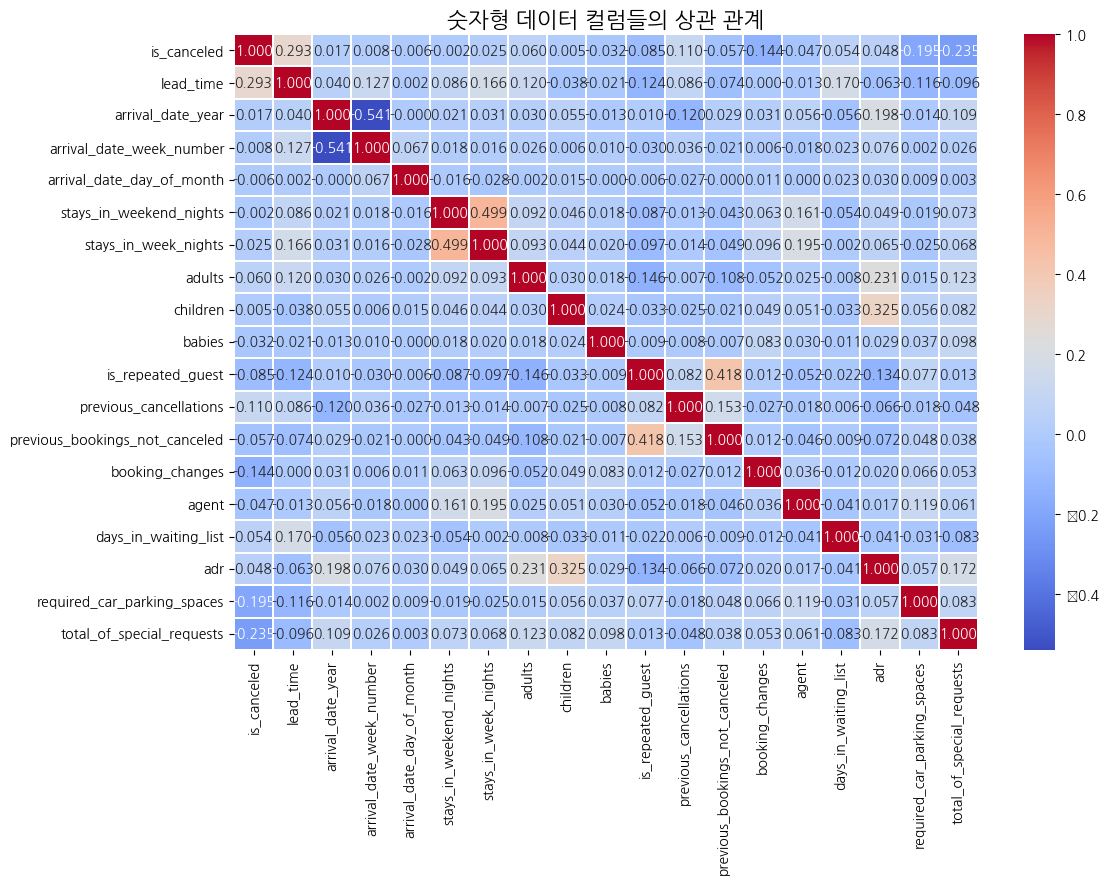

In [1053]:
# 데이터 프레임 내 numeric 데이터들 간의 상관관계 시각화
numeric_data = df.select_dtypes(include=['number'])

# 숫자형 데이터의 상관 행렬 계산
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.title('숫자형 데이터 컬럼들의 상관 관계', fontsize=16)
plt.show()

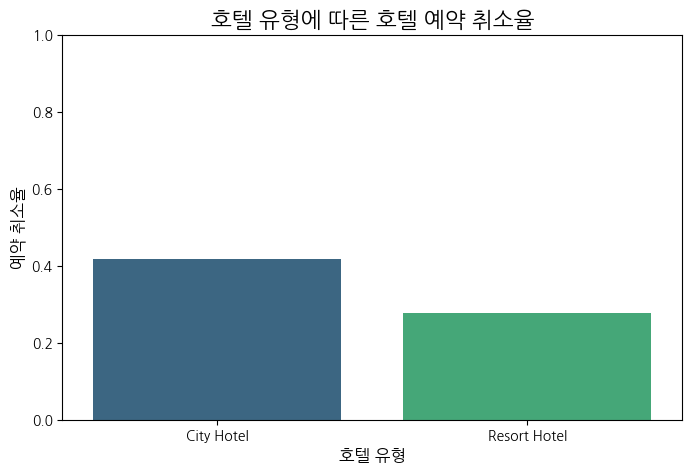

,호텔 유형,예약 취소율
0,City Hotel,0.417270
1,Resort Hotel,0.277634


In [1054]:
# Q1 - 호텔 유형에 따라 호텔 예약 취소율은 어떻게 되는가?
hotel_cancellation_rate = df.groupby('hotel')['is_canceled'].mean().reset_index()
hotel_cancellation_rate.columns = ['호텔 유형', '예약 취소율']

plt.figure(figsize=(8, 5))
sns.barplot(data=hotel_cancellation_rate, x='호텔 유형', y='예약 취소율', palette='viridis')
plt.title('호텔 유형에 따른 호텔 예약 취소율', fontsize=16)
plt.ylabel('예약 취소율', fontsize=12)
plt.xlabel('호텔 유형', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

hotel_cancellation_rate

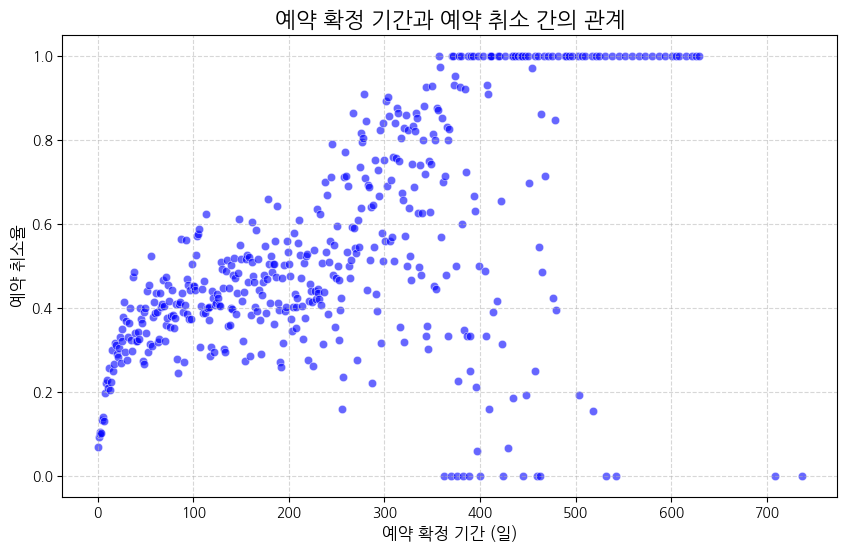

In [1055]:
# Q2- 예약 확정까지 걸린 시간(lead_time)과 호텔 예약 취소(is_canceled)의 관계는 어떻게 되는가?
lead_time_cancellation = df.groupby('lead_time')['is_canceled'].mean().reset_index()
lead_time_cancellation.columns = ['예약 확정 기간', '예약 취소율']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lead_time_cancellation, x='예약 확정 기간', y='예약 취소율', color='blue', alpha=0.6)
plt.title('예약 확정 기간과 예약 취소 간의 관계', fontsize=16)
plt.xlabel('예약 확정 기간 (일)', fontsize=12)
plt.ylabel('예약 취소율', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

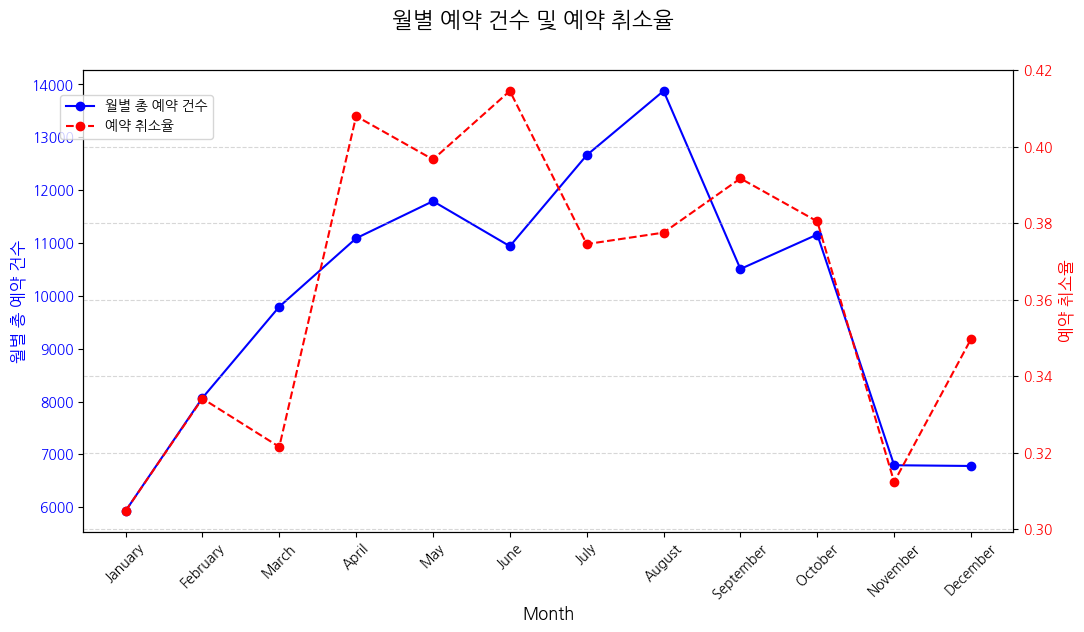

In [1056]:
# Q3 - 월별 총 예약 건수와 예약 취소율의 흐름은 어떻게 되는가?
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

monthly_data = df.groupby('arrival_date_month')['is_canceled'].agg(['count', 'mean']).reindex(month_order)
monthly_data.columns = ['월별 총 예약 건수', '예약 취소율']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(monthly_data.index, monthly_data['월별 총 예약 건수'], color='blue', marker='o', label='월별 총 예약 건수')
ax1.set_ylabel('월별 총 예약 건수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.set_xlabel('Month', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data['예약 취소율'], color='red', marker='o', linestyle='--', label='예약 취소율')
ax2.set_ylabel('예약 취소율', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)

fig.suptitle('월별 예약 건수 및 예약 취소율', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85), fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

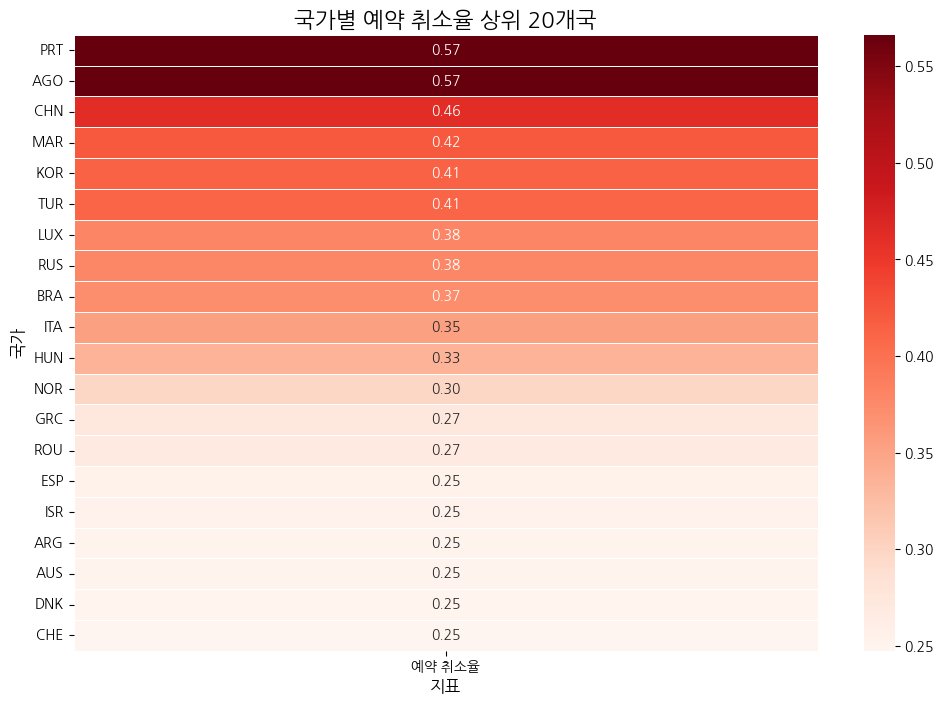

In [1057]:
# Q4 - 어떤 국가에서 온 고객들이 더 자주 예약을 취소하는가?
# 예약 취소의 총합이 가장 많은게 아니라, "나라별" 총 예약 건수 중 "예약을 취소한 비율"이 가장 높은 상위 20개국

# 국가별 예약 취소율 계산
country_cancellation_rate = df.groupby('country')['is_canceled'].mean().reset_index()
country_cancellation_rate.columns = ['국가', '예약 취소율']

# 충분한 데이터가 있는 국가 필터링 (예: 100건 이상 예약)
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts > 100].index
filtered_data = country_cancellation_rate[country_cancellation_rate['국가'].isin(valid_countries)]

# 취소율 기준으로 데이터 정렬
filtered_data = filtered_data.sort_values(by='예약 취소율', ascending=False)

# 히트맵 시각화: 취소율 상위 20개 국가
plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_data.head(20).set_index('국가'), 
    annot=True, cmap='Reds', fmt='.2f', linewidths=.5
)
plt.title('국가별 예약 취소율 상위 20개국', fontsize=16)
plt.xlabel('지표', fontsize=12)
plt.ylabel('국가', fontsize=12)
plt.show()

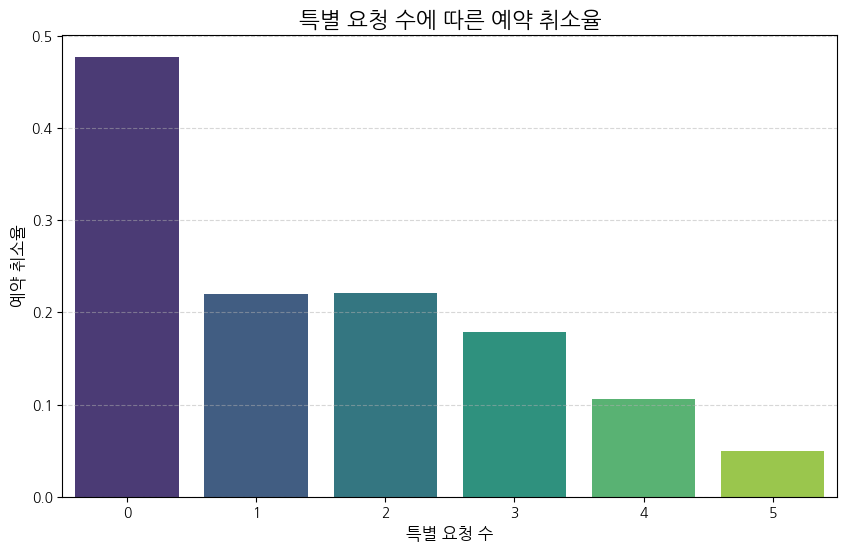

In [1058]:
# Q5 - 특별 요청 수에 따른 호텔 예약 취소율은 어떻게 되는가?
# 특별 요청 수에 따른 평균 취소율 계산
special_requests_cancellation = df.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()
special_requests_cancellation.columns = ['특별 요청 수', '예약 취소율']

# 특별 요청 수에 따른 취소율 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(data=special_requests_cancellation, x='특별 요청 수', y='예약 취소율', palette='viridis')
plt.title('특별 요청 수에 따른 예약 취소율', fontsize=16)
plt.xlabel('특별 요청 수', fontsize=12)
plt.ylabel('예약 취소율', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

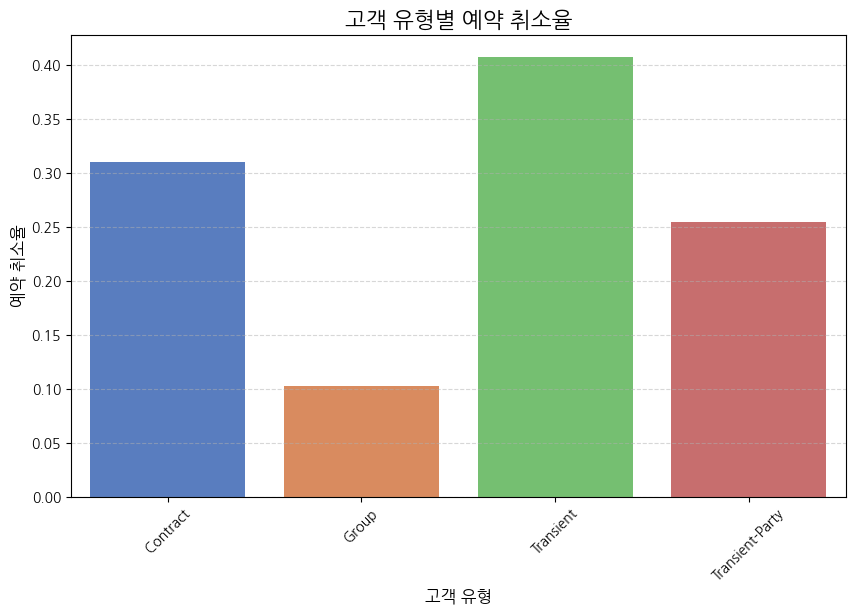

In [1059]:
# Q6 - 고객 유형에 따른 호텔 예약 취소율은 어떻게 되는가?
# 고객 유형별 예약 취소율 계산
customer_type_cancellation = df.groupby('customer_type')['is_canceled'].mean().reset_index()
customer_type_cancellation.columns = ['고객 유형', '예약 취소율']

# 고객 유형별 취소율 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_type_cancellation, x='고객 유형', y='예약 취소율', palette='muted')
plt.title('고객 유형별 예약 취소율', fontsize=16)
plt.xlabel('고객 유형', fontsize=12)
plt.ylabel('예약 취소율', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

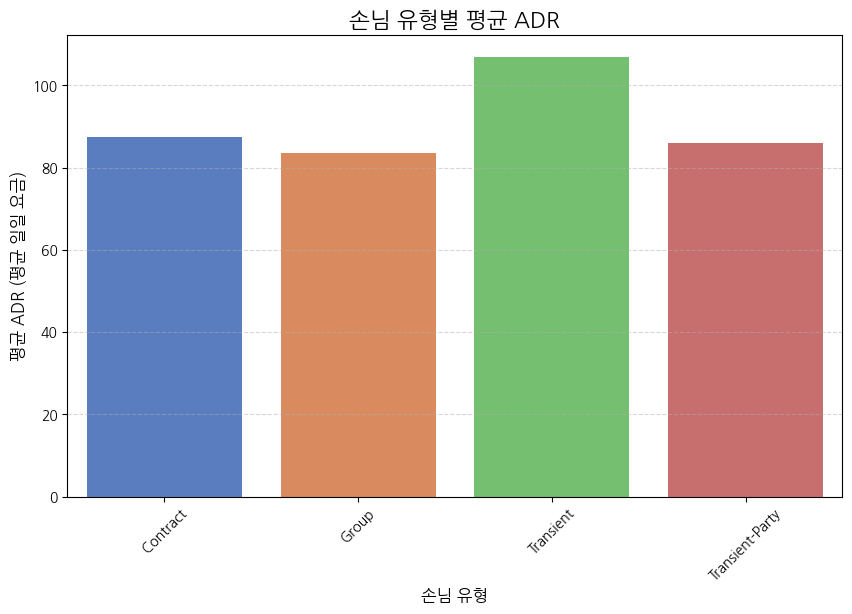

In [1060]:
# Q7 - 손님 유형별 평균 ADR은 어떻게 되는가?
customer_type_adr = df.groupby('customer_type')['adr'].mean().reset_index()
customer_type_adr.columns = ['손님 유형', '평균 ADR']

# 손님 유형별 평균 ADR (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_type_adr, x='손님 유형', y='평균 ADR', palette='muted')
plt.title('손님 유형별 평균 ADR', fontsize=16)
plt.xlabel('손님 유형', fontsize=12)
plt.ylabel('평균 ADR (평균 일일 요금)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [1061]:
# # Q8 - 고객이 방문한 월과 재방문율의 관계는 어떻게 될까?
# # 월 순서대로 정렬하기 위해 'arrival_date_month'를 Categorical 타입으로 변환
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# month_repeated_guest['방문 월'] = pd.Categorical(month_repeated_guest['방문 월'], categories=month_order, ordered=True)

# # 도착 월별 재방문 고객 비율 (막대 그래프)
# plt.figure(figsize=(12, 6))
# sns.barplot(data=month_repeated_guest.sort_values('방문 월'), x='방문 월', y='재방문 고객 비율', palette='muted')
# plt.title('호텔 방문 월과 손님 재방문의 관계', fontsize=16)
# plt.xlabel('방문 월', fontsize=12)
# plt.ylabel('재방문 고객 비율', fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.show()

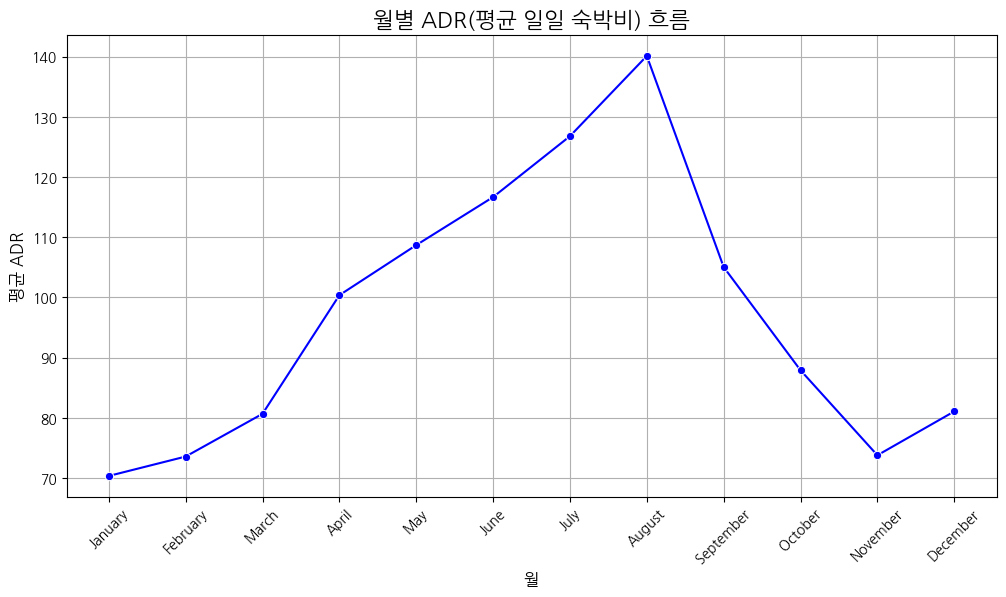

In [1062]:
# Q9 - 월에 따른 평균 일일 숙박비의 흐름은 어떻게 되는가?
# 월별 ADR 평균 계산
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# 'arrival_date_month'를 월 순서대로 정렬
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_adr['arrival_date_month'] = pd.Categorical(monthly_adr['arrival_date_month'], categories=month_order, ordered=True)

# 월별 ADR 흐름 (선 그래프)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr', marker='o', color='blue')
plt.title('월별 ADR(평균 일일 숙박비) 흐름', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('평균 ADR', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()

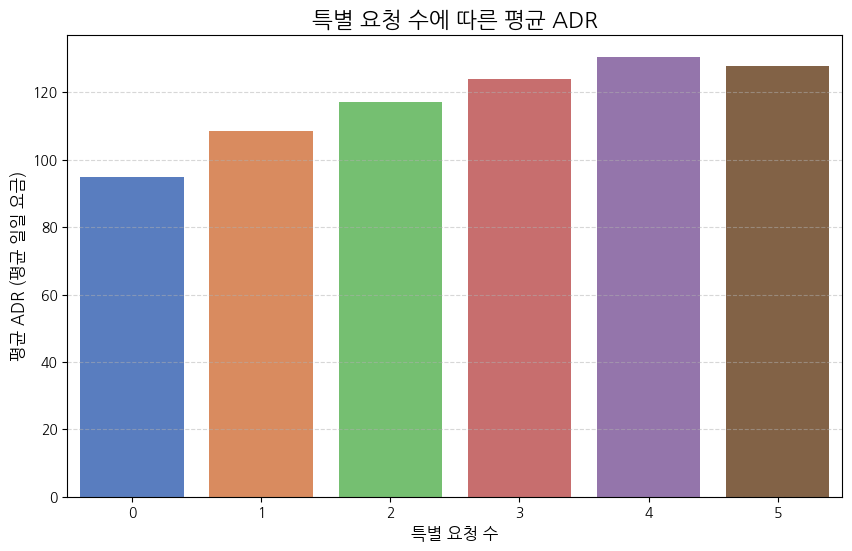

In [1063]:
# Q10 - 고객의 특별 요청 수에 따른 평균 ADR은 어떻게 되는가?
special_requests_adr = df.groupby('total_of_special_requests')['adr'].mean().reset_index()
special_requests_adr.columns = ['특별 요청 수', '평균 ADR']

# 특별 요청 수에 따른 평균 ADR (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(data=special_requests_adr, x='특별 요청 수', y='평균 ADR', palette='muted')
plt.title('특별 요청 수에 따른 평균 ADR', fontsize=16)
plt.xlabel('특별 요청 수', fontsize=12)
plt.ylabel('평균 ADR (평균 일일 요금)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

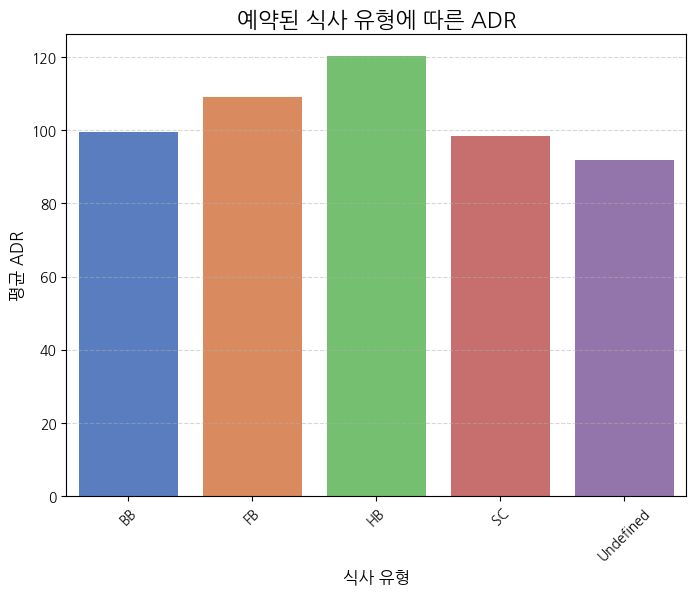

In [1064]:
# Q11 - 예약된 식사의 유형에 따른 평균 일일 숙박비용은 어떻게 되는가?(Undefined와 SC는 식사가 없는 경우를 뜻함)
# 예약된 식사 유형별로 ADR의 평균 계산
meal_adr = df.groupby('meal')['adr'].mean().reset_index()

# 예약된 식사 유형별 ADR (막대 그래프)
plt.figure(figsize=(8, 6))
sns.barplot(data=meal_adr, x='meal', y='adr', palette='muted')
plt.title('예약된 식사 유형에 따른 ADR', fontsize=16)
plt.xlabel('식사 유형', fontsize=12)
plt.ylabel('평균 ADR', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

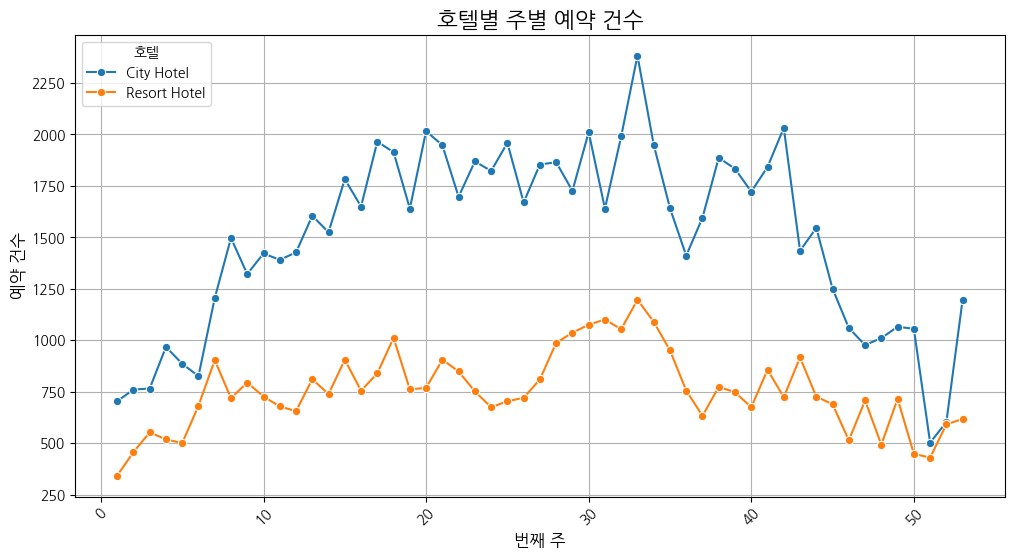

In [1065]:
# Q12 - 각 호텔별 주별 예약 건수 흐름은 어떻게 되는가? 
weekly_bookings_by_hotel = df.groupby(['hotel', 'arrival_date_week_number']).size().reset_index(name='예약 건수')

# 호텔별 주별 예약 건수 (선 그래프)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_bookings_by_hotel, x='arrival_date_week_number', y='예약 건수', hue='hotel', marker='o')
plt.title('호텔별 주별 예약 건수', fontsize=16)
plt.xlabel('번째 주', fontsize=12)
plt.ylabel('예약 건수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.legend(title='호텔', loc='upper left')
plt.show()

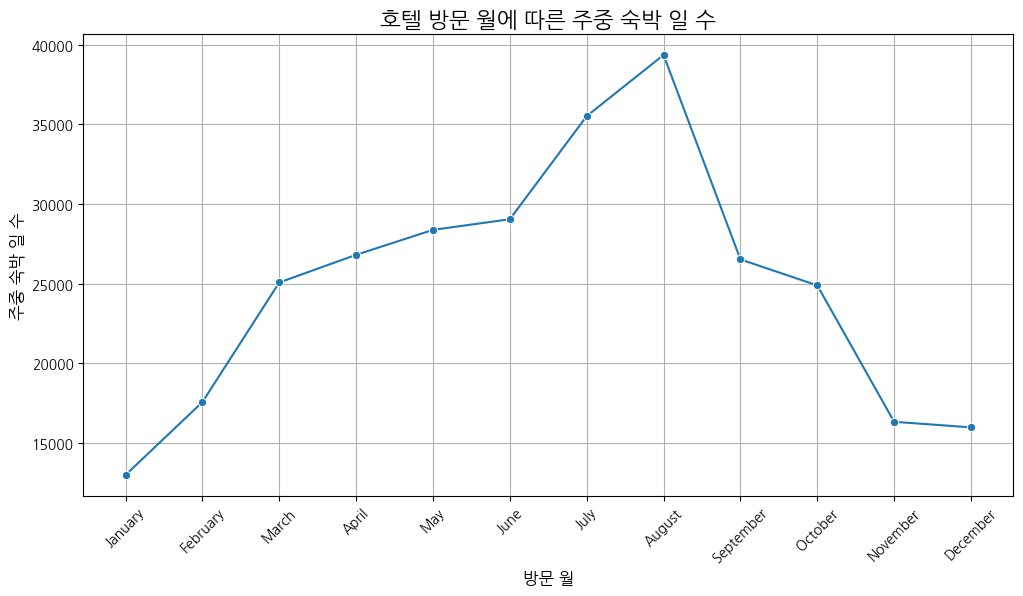

In [1066]:
# Q13 - 월에 따른 주중 숙박 일 수는 어떻게 되는가?
# 'arrival_date_month'를 월 순서대로 정렬하기 위해 순서형 데이터로 변환
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# 월별 주중 숙박 일 수 총합 계산
month_weekday_stays = df.groupby('arrival_date_month')['stays_in_week_nights'].sum().reset_index()
month_weekday_stays.columns = ['방문 월', '주중 숙박 일 수']

# 시각화: 월별 주중 숙박 일 수 (선 그래프)
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_weekday_stays, x='방문 월', y='주중 숙박 일 수', marker='o', palette='muted')
plt.title('호텔 방문 월에 따른 주중 숙박 일 수', fontsize=16)
plt.xlabel('방문 월', fontsize=12)
plt.ylabel('주중 숙박 일 수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()

In [1067]:
#Hypothesis_test

In [1068]:
#Case1. 종속변수가 범주형일 때 (logistic regression을 위한 feature 선정)

#nominal과 numeric 변수로 분류
nominal_cols = ['meal','market_segment','distribution_channel','is_repeated_guest',
               'deposit_type','customer_type','arrival_date_month','reserved_room_type']
numeric_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults',
                'children','babies','previous_cancellations','previous_bookings_not_canceled',
               'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces',
                'total_of_special_requests','arrival_date_week_number','arrival_date_day_of_month']
target_col = ['hotel']

#numeric_cols는 t_test 또는 anova_vars으로 검정 가능하다.
#norminal_cols는 chi_square으로 검정 가능하다.

In [1069]:
import numpy as np

In [1070]:
#이상치 대체 후 t-test하는 function
from scipy.stats import kstest, bartlett, ttest_ind, ranksums

selected_numeric_features = []  # 로지스틱 회귀에 사용할 특성을 저장할 리스트

print("=== T-test 및 정규성/등분산성 검토 ===")
for var in numeric_cols:
    if df[var].dtype in ['int64', 'float64']:
        # 두 그룹 생성
        group1 = df[df['hotel'] == 'Resort Hotel'][var].copy()
        group2 = df[df['hotel'] == 'City Hotel'][var].copy()

        # IQR 계산 및 이상치 대체
        for group, name in zip([group1, group2], ['Group1', 'Group2']):
            Q1 = group.quantile(0.25)
            Q3 = group.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # median 계산 (IQR 내부 값만 사용)
            median_value = group[(group >= lower_bound) & (group <= upper_bound)].median()

            # 이상치를 평균값으로 대체
            group[(group < lower_bound) | (group > upper_bound)] = median_value
            print(f"{var} - {name} 이상치 처리 완료. 중앙값 = {median_value:.4f}")
        
        # 정규성 검정 (shapiro test-> KS test로 대체)
        stat_g1, p_g1 = kstest(group1, 'norm', args=(group1.mean(), group1.std()))
        stat_g2, p_g2 = kstest(group2, 'norm', args=(group2.mean(), group2.std()))
        is_normal = (p_g1 > 0.05) and (p_g2 > 0.05)
        print(f"{var} - 정규성 검정: Group1 p-value = {p_g1:.10f}, Group2 p-value = {p_g2:.10f}, Normal = {is_normal}")

        # 등분산성 검정 (bartlett test)
        stat_var, p_var = bartlett(group1, group2)
        is_equal_var = p_var > 0.05
        print(f"{var} - 등분산성 검정: Bartlett p-value = {p_var:.10f}, Equal Variance = {is_equal_var}")

        # T-test 또는 대안적 방법 선택
        if is_normal:
            if is_equal_var:#등분산 two sample t-test
                t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
                test_type = "T-test (Equal Variance)"
            else:#이분산 two sample t-test
                t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
                test_type = "T-test (Unequal Variance)"
        else:  # 비모수 검정
            t_stat, p_value = ranksums(group1, group2)
            test_type = "Rank sums Test (Non-Normal)"
        
        print(f"{var}: {test_type}, t-statistic = {t_stat:.4f}, p-value = {p_value:.10f}")

        # 유의미한 특성 선택 (p-value 기준)
        if p_value < 0.05:
            selected_numeric_features.append(var)

    print("-" * 50)


=== T-test 및 정규성/등분산성 검토 ===
lead_time - Group1 이상치 처리 완료. 중앙값 = 56.0000
lead_time - Group2 이상치 처리 완료. 중앙값 = 70.0000
lead_time - 정규성 검정: Group1 p-value = 0.0000000000, Group2 p-value = 0.0000000000, Normal = False
lead_time - 등분산성 검정: Bartlett p-value = 0.8458593703, Equal Variance = True
lead_time: Rank sums Test (Non-Normal), t-statistic = -24.5550, p-value = 0.0000000000
--------------------------------------------------
stays_in_weekend_nights - Group1 이상치 처리 완료. 중앙값 = 1.0000
stays_in_weekend_nights - Group2 이상치 처리 완료. 중앙값 = 1.0000
stays_in_weekend_nights - 정규성 검정: Group1 p-value = 0.0000000000, Group2 p-value = 0.0000000000, Normal = False
stays_in_weekend_nights - 등분산성 검정: Bartlett p-value = 0.0000000000, Equal Variance = False
stays_in_weekend_nights: Rank sums Test (Non-Normal), t-statistic = 53.1165, p-value = 0.0000000000
--------------------------------------------------
stays_in_week_nights - Group1 이상치 처리 완료. 중앙값 = 3.0000
stays_in_week_nights - Group2 이상치 처리 완료. 중앙값 = 2.00

In [1071]:
#이상치 대체없이 t-test하는 function
from scipy.stats import kstest, bartlett, ttest_ind, ranksums

print("=== T-test 및 정규성/등분산성 검토 ===")
for var in numeric_cols:
    if df[var].dtype in ['int64', 'float64']:
        group1 = df[df['hotel'] == 'Resort Hotel'][var].dropna()
        group2 = df[df['hotel'] == 'City Hotel'][var].dropna()
        print(np.shape(group1), np.shape(group2))
        
        # 정규성 검정 (shapiro test-> KS test로 대체)
        stat_g1, p_g1 = kstest(group1, 'norm', args=(group1.mean(), group1.std()))
        stat_g2, p_g2 = kstest(group2, 'norm', args=(group2.mean(), group2.std()))
        is_normal = (p_g1 > 0.05) and (p_g2 > 0.05)
        print(f"{var} - 정규성 검정: Group1 p-value = {p_g1:.10f}, Group2 p-value = {p_g2:.10f}, Normal = {is_normal}")

        # 등분산성 검정 (bartlett test)
        stat_var, p_var = bartlett(group1, group2)
        is_equal_var = p_var > 0.05
        print(f"{var} - 등분산성 검정: Bartlett p-value = {p_var:.10f}, Equal Variance = {is_equal_var}")

        # T-test 또는 대안적 방법 선택
        if is_normal:
            if is_equal_var:#등분산 two sample t-test
                t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
                test_type = "T-test (Equal Variance)"
            else:#이분산 two sample t-test
                t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
                test_type = "T-test (Unequal Variance)"
        else:  # 비모수 검정
            t_stat, p_value = ranksums(group1, group2)
            test_type = "Rank sums Test (Non-Normal)"
        
        print(f"{var}: {test_type}, t-statistic = {t_stat:.4f}, p-value = {p_value:.10f}")
    print("-" * 50)

=== T-test 및 정규성/등분산성 검토 ===
(40060,) (79330,)
lead_time - 정규성 검정: Group1 p-value = 0.0000000000, Group2 p-value = 0.0000000000, Normal = False
lead_time - 등분산성 검정: Bartlett p-value = 0.0000000000, Equal Variance = False
lead_time: Rank sums Test (Non-Normal), t-statistic = -29.4530, p-value = 0.0000000000
--------------------------------------------------
(40060,) (79330,)
stays_in_weekend_nights - 정규성 검정: Group1 p-value = 0.0000000000, Group2 p-value = 0.0000000000, Normal = False
stays_in_weekend_nights - 등분산성 검정: Bartlett p-value = 0.0000000000, Equal Variance = False
stays_in_weekend_nights: Rank sums Test (Non-Normal), t-statistic = 53.8082, p-value = 0.0000000000
--------------------------------------------------
(40060,) (79330,)
stays_in_week_nights - 정규성 검정: Group1 p-value = 0.0000000000, Group2 p-value = 0.0000000000, Normal = False
stays_in_week_nights - 등분산성 검정: Bartlett p-value = 0.0000000000, Equal Variance = False
stays_in_week_nights: Rank sums Test (Non-Normal), t-sta

In [1072]:
#p-value = 0.0587543453

In [1073]:
#nominal 독립변수와의 연관성 - 카이제곱 test
from scipy.stats import chi2_contingency
import pandas as pd

selected_nominal_features = []  # 유의미한 명목형 특성을 저장할 리스트

print("\n=== 카이제곱 검정 결과 ===")
for var in nominal_cols:
    # 결측값 제거
    data_clean = df.dropna(subset=[var, 'hotel'])

    # 교차표 생성
    contingency_table = pd.crosstab(data_clean[var], data_clean['hotel'])

    # 카이제곱 검정
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: chi2 = {chi2:.4f}, p-value = {p:.4f}")
    print("Expected Frequencies:\n", expected)
    print("-" * 50)

    # 유의미한 특성 선택
    if p < 0.05:  # 유의 수준 기준
        selected_nominal_features.append(var)


=== 카이제곱 검정 결과 ===
meal: chi2 = 11973.6428, p-value = 0.0000
Expected Frequencies:
 [[61336.39584555 30973.60415445]
 [  530.23988609   267.76011391]
 [ 9610.09958958  4852.90041042]
 [ 7076.50975794  3573.49024206]
 [  776.75492085   392.24507915]]
--------------------------------------------------
market_segment: chi2 = 2576.4052, p-value = 0.0000
Expected Frequencies:
 [[1.57477259e+02 7.95227406e+01]
 [4.93694531e+02 2.49305469e+02]
 [3.51832105e+03 1.77667895e+03]
 [8.37619549e+03 4.22980451e+03]
 [1.31636371e+04 6.64736293e+03]
 [1.60925812e+04 8.12641880e+03]
 [3.75267645e+04 1.89502355e+04]
 [1.32892202e+00 6.71077980e-01]]
--------------------------------------------------
distribution_channel: chi2 = 4177.8833, p-value = 0.0000
Expected Frequencies:
 [[4.43660616e+03 2.24039384e+03]
 [9.73103149e+03 4.91396851e+03]
 [1.28240975e+02 6.47590250e+01]
 [6.50307991e+04 3.28392009e+04]
 [3.32230505e+00 1.67769495e+00]]
--------------------------------------------------
is_repeated

In [1074]:
# 선택된 특성 리스트
selected_features = selected_numeric_features + selected_nominal_features + ["hotel"]
print("=== 선택된 특성 ===")
print(selected_features)

# 선택된 특성을 기준으로 df에서 데이터 추출 및 상위 5개 출력
filtered_df = df[selected_features]  # 선택된 컬럼만 추출
print("\n=== 선택된 특성에 대한 데이터 (Head 5) ===")
filtered_df.head(5)

=== 선택된 특성 ===
['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr', 'total_of_special_requests', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type', 'customer_type', 'arrival_date_month', 'reserved_room_type', 'hotel']

=== 선택된 특성에 대한 데이터 (Head 5) ===


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,meal,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type,arrival_date_month,reserved_room_type,hotel
0,342,0,0,0.0,0,BB,Direct,Direct,0,No Deposit,Transient,July,C,Resort Hotel
1,737,0,0,0.0,0,BB,Direct,Direct,0,No Deposit,Transient,July,C,Resort Hotel
2,7,0,1,75.0,0,BB,Direct,Direct,0,No Deposit,Transient,July,A,Resort Hotel
3,13,0,1,75.0,0,BB,Corporate,Corporate,0,No Deposit,Transient,July,A,Resort Hotel
4,14,0,2,98.0,1,BB,Online TA,TA/TO,0,No Deposit,Transient,July,A,Resort Hotel


총 특성 수: 28

누적 설명된 분산 비율:
PC1: 0.1377
PC2: 0.2583
PC3: 0.3471
PC4: 0.4204
PC5: 0.4851
PC6: 0.5428
PC7: 0.5947
PC8: 0.6426
PC9: 0.6886
PC10: 0.7331
PC11: 0.7745
PC12: 0.8150
PC13: 0.8526
PC14: 0.8838
PC15: 0.9133
PC16: 0.9414
PC17: 0.9646

상위 10개 중요 특성과 점수:
                      Feature         Score
19         reserved_room_type  19150.170379
10                   children  12402.070548
20         assigned_room_type   7311.532879
14             market_segment   6020.603310
9                      adults   5907.923244
3           arrival_date_year   4322.743761
26  total_of_special_requests   3204.529199
16          is_repeated_guest   1906.068756
13                    country   1502.025770
4          arrival_date_month   1254.640584

선택된 특성 수: 20
PCA 후 주성분 수: 17
설명된 총 분산 비율: 0.9646

모델 성능:
MSE: 2775.6395
RMSE: 52.6843
R-squared: 0.2066

잔차 통계:
평균 잔차: 0.1567
잔차 표준편차: 52.6841

모델 결과:
                            OLS Regression Results                            
Dep. Variable:              

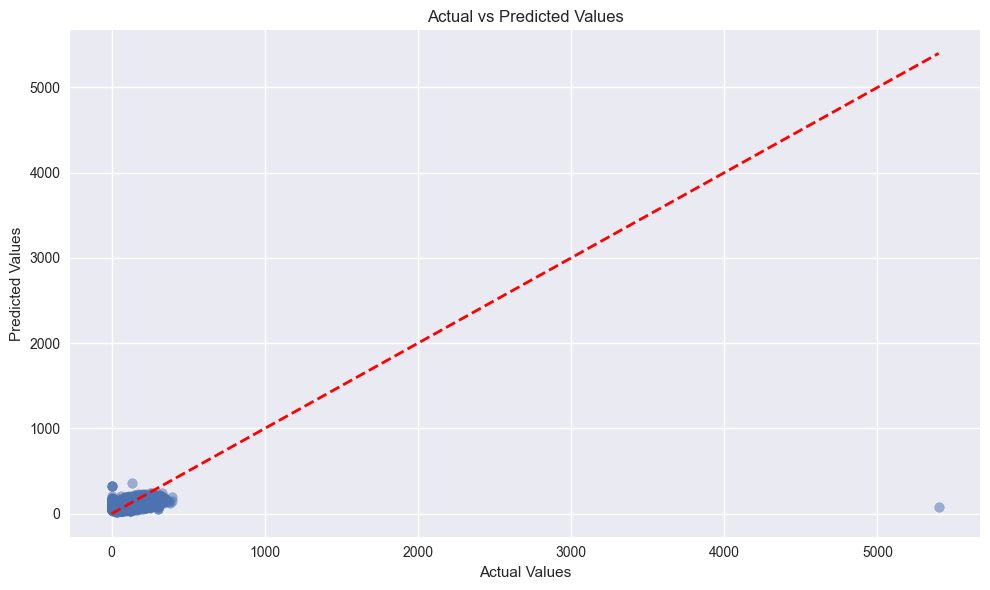

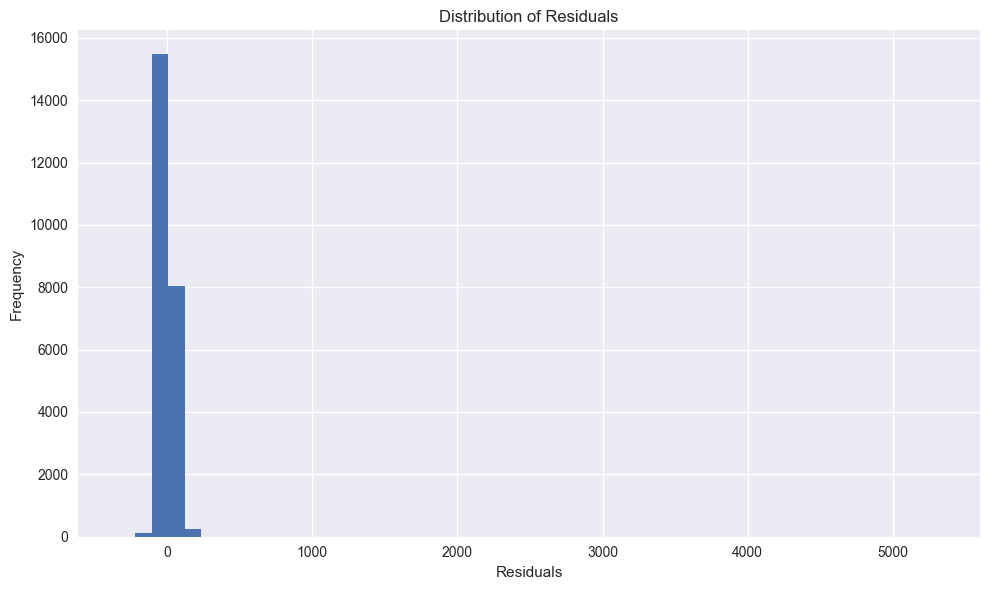

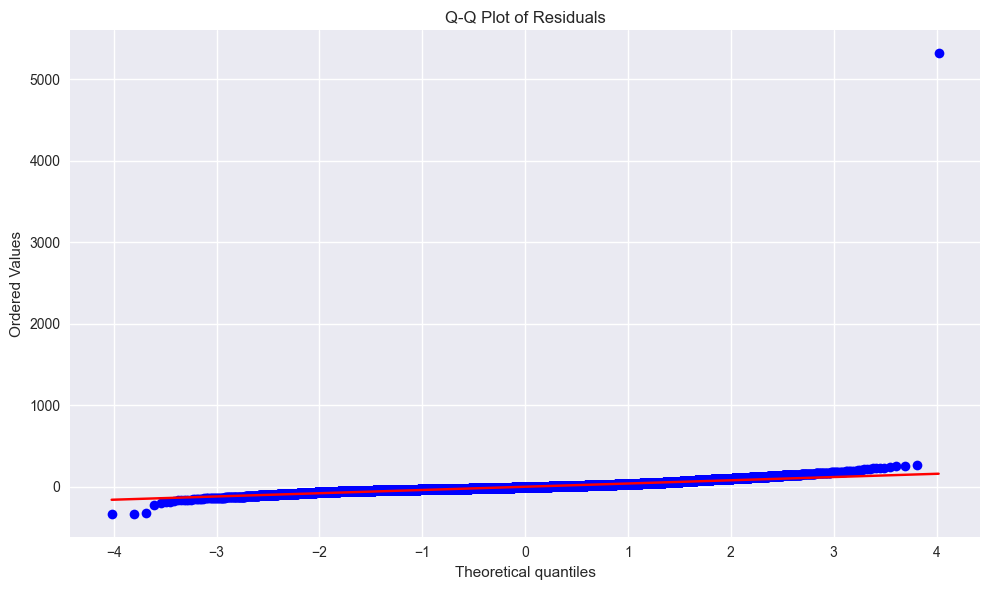

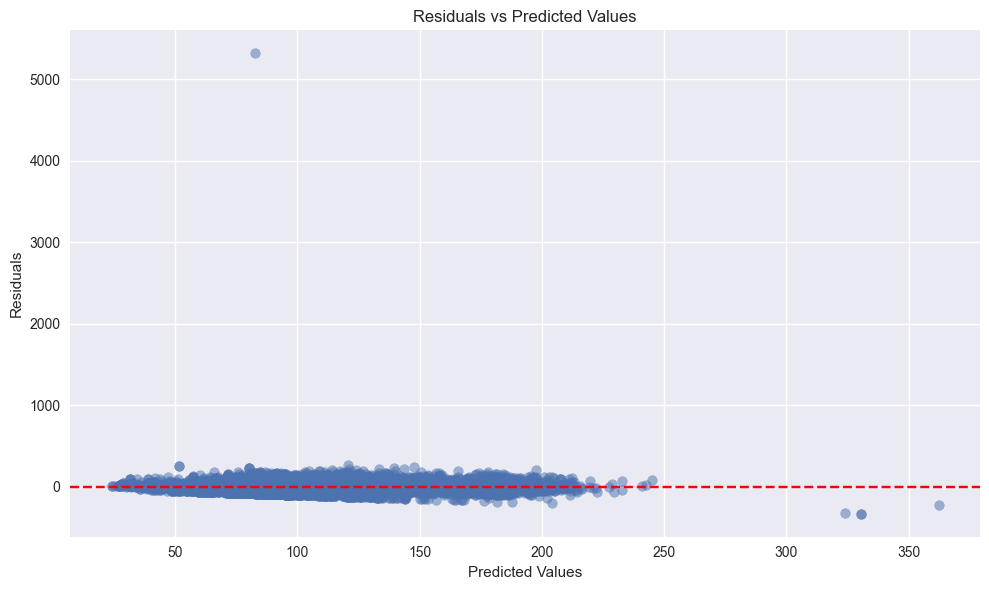

In [1104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# 데이터 로드 및 전처리
data = pd.read_csv('hotel_bookings.csv')
data.drop(inplace=True, axis=1, labels=['agent', 'company', 'reservation_status_date'])
data.fillna(data.mode().iloc[0], inplace=True)

# 종속변수 선택 (예: adr - average daily rate)
y = data['adr']
X = data.drop(['adr'], axis=1)

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_columns = ['hotel', 'meal', 'distribution_channel', 'reservation_status', 'country',
                      'arrival_date_month', 'market_segment', 'deposit_type', 
                      'customer_type', 'reserved_room_type', 'assigned_room_type']

for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 스케일링
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# 특성 수 확인
n_features = X_train_scaled.shape[1]
print(f"총 특성 수: {n_features}")

# 특성 선택 (전체 특성 중 상위 20개 선택)
k = min(20, n_features)
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# 선택된 특성의 인덱스 저장
selected_features_mask = selector.get_support()
selected_features = X_train.columns[selected_features_mask].tolist()

# 특성 중요도 점수 계산
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# PCA 적용 (설명된 분산 비율 출력)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print("\n누적 설명된 분산 비율:")
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# statsmodels의 선형 회귀 모델 학습
X_train_final = sm.add_constant(X_train_pca)
X_test_final = sm.add_constant(X_test_pca)

# 모델 학습
model = sm.OLS(y_train, X_train_final)
results = model.fit()

# 예측
y_pred = results.predict(X_test_final)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("\n상위 10개 중요 특성과 점수:")
print(feature_scores.head(10))

print(f"\n선택된 특성 수: {k}")
print(f"PCA 후 주성분 수: {pca.n_components_}")
print(f"설명된 총 분산 비율: {sum(pca.explained_variance_ratio_):.4f}")

print(f"\n모델 성능:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# 잔차 분석
residuals = y_test - y_pred
print("\n잔차 통계:")
print(f"평균 잔차: {np.mean(residuals):.4f}")
print(f"잔차 표준편차: {np.std(residuals):.4f}")

# 모델 요약
print("\n모델 결과:")
print(results.summary())

# 추가적인 회귀 진단
# Durbin-Watson 검정
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(results.resid)
print(f"\nDurbin-Watson 통계량: {dw_statistic:.4f}")

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# 2. Residual Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# 3. Q-Q Plot
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# 4. Residuals vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()
